In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



In [ ]:
class Residual_Block(nn.Module):
    def __init__(self, dim):
        super(Residual_Block,self).__init__()
        # Residual Block
        self.residual_block = nn.Sequential(
                nn.Conv2d(dim, dim, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(dim, dim, kernel_size=3, padding=1),
            )            
        self.relu = nn.ReLU()
                  
    def forward(self, x):
        out = self. residual_block(x)  # F(x)
        out = out + x  # F(x) + x
        out = self.relu(out)
        return out

In [ ]:
class model3(nn.Module):
    def __init__(self):
        super(model3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.residual = Residual_Block(32)
        self.after =  nn.Sequential(nn.MaxPool2d(kernel_size=2),
                    nn.Flatten(),
                    nn.Linear(6272,64), 
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.residual(x)
        x = self.residual(x)
        output = self.after(x)
        
        return output

In [ ]:
model1=nn.Sequential(nn.Conv2d(in_channels=1,out_channels=32,stride=1,padding=1,kernel_size=3),
                    nn.ReLU(),          
                    nn.Conv2d(in_channels=32,out_channels=64,stride=1,padding=1,kernel_size=3), 
                    nn.ReLU(),          
                    nn.MaxPool2d(kernel_size=2),
                    nn.Flatten(),
                    nn.Linear(12544,64), 
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1) 

                  ) 

print(model1)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Flatten(start_dim=1, end_dim=-1)
  (6): Linear(in_features=12544, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
model2=nn.Sequential(nn.Conv2d(in_channels=1,out_channels=8,stride=1,padding=1,kernel_size=3),
                    nn.ReLU(),          
                    nn.Conv2d(in_channels=8,out_channels=16,stride=1,padding=1,kernel_size=3), 
                    nn.ReLU(),          
                    nn.MaxPool2d(kernel_size=2),
                    nn.Conv2d(in_channels=16,out_channels=32,stride=1,padding=1,kernel_size=3), 
                    nn.ReLU(),
                    nn.Conv2d(in_channels=32,out_channels=64,stride=1,padding=1,kernel_size=3), 
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2),
                    nn.Flatten(),
                    nn.Linear(64*7*7,64), 
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1) 

                  ) 



In [ ]:
def test(model,test_loader):
    model.eval()
    correct = 0
    for data, target in test_loader:
        with torch.no_grad():
            output = model(data)    
        prediction = output.data.max(1)[1]
        correct += prediction.eq(target.data).sum()
        
    print('\nTest set: Accuracy: {:.2f}%'.format(100. * correct / len(test_loader.dataset)))
    return (correct / len(test_loader.dataset)).item()

In [ ]:
def plot(loss,acc):

    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(loss)
    plt.show()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.plot(acc)
    plt.axis([0, 30, 0.8, 1])
    plt.show()



In [ ]:
def train(num,model,trainloader,testloader):   
    epochs = 30 # total number of iteration for training
    running_loss_list= []
    test_acc_list =[]
    epochs_list = []
    optimizer = optim.Adam(model.parameters())
    criterion = nn.NLLLoss()

    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:

            # defining gradient in each epoch as 0
            optimizer.zero_grad()
            
            # modeling for each image batch
            output = model(images)
            
            # calculating the loss
            loss = criterion(output, labels)
            
            # This is where the model learns by backpropagating
            loss.backward()
            
            # And optimizes its weights here
            optimizer.step()
            
            # calculating the loss
            running_loss += loss.item()
            
        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
            
            running_loss_list.append(running_loss/len(trainloader))
            test_acc_list.append(test(model,testloader))



    # Save model
    torch.save(model, 'model'+ num +'.pt')
    print(running_loss_list)
    print(test_acc_list)
    return running_loss_list, test_acc_list

Epoch 0 - Training loss: 0.14298239620198727

Test set: Accuracy: 98.14%
Epoch 1 - Training loss: 0.04497779678133763

Test set: Accuracy: 98.71%
Epoch 2 - Training loss: 0.02976325931721173

Test set: Accuracy: 98.46%
Epoch 3 - Training loss: 0.020983490795000156

Test set: Accuracy: 98.80%
Epoch 4 - Training loss: 0.015589301405161677

Test set: Accuracy: 98.65%
Epoch 5 - Training loss: 0.01082207797361112

Test set: Accuracy: 98.60%
Epoch 6 - Training loss: 0.009640360721292703

Test set: Accuracy: 98.65%
Epoch 7 - Training loss: 0.008245395978563247

Test set: Accuracy: 98.80%
Epoch 8 - Training loss: 0.006850645554902002

Test set: Accuracy: 98.62%
Epoch 9 - Training loss: 0.006523367158379768

Test set: Accuracy: 98.61%
Epoch 10 - Training loss: 0.005320990713384799

Test set: Accuracy: 98.67%
Epoch 11 - Training loss: 0.004550748887613842

Test set: Accuracy: 98.95%
Epoch 12 - Training loss: 0.00508165195163382

Test set: Accuracy: 98.64%
Epoch 13 - Training loss: 0.004185712314

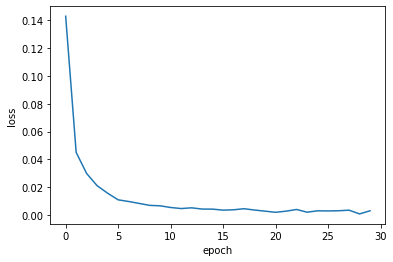

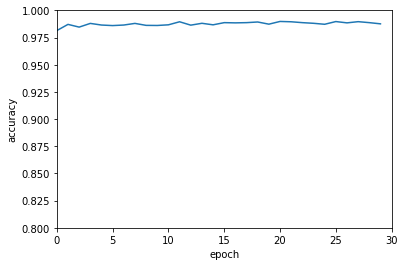

In [ ]:
loss, acc = train("1",model1,trainloader,testloader)

plot(loss,acc)

Epoch 0 - Training loss: 0.18593756237785178

Test set: Accuracy: 98.52%
Epoch 1 - Training loss: 0.049936379644835445

Test set: Accuracy: 98.84%
Epoch 2 - Training loss: 0.03409642637273161

Test set: Accuracy: 98.87%
Epoch 3 - Training loss: 0.026867428119094258

Test set: Accuracy: 98.75%
Epoch 4 - Training loss: 0.021008524987479783

Test set: Accuracy: 98.91%
Epoch 5 - Training loss: 0.017469433142940336

Test set: Accuracy: 99.10%
Epoch 6 - Training loss: 0.01431215325221918

Test set: Accuracy: 99.25%
Epoch 7 - Training loss: 0.012263585603369051

Test set: Accuracy: 98.92%
Epoch 8 - Training loss: 0.00964316963643436

Test set: Accuracy: 99.00%
Epoch 9 - Training loss: 0.009612153546499181

Test set: Accuracy: 99.02%
Epoch 10 - Training loss: 0.00821195545246899

Test set: Accuracy: 98.99%
Epoch 11 - Training loss: 0.00755391624266404

Test set: Accuracy: 99.29%
Epoch 12 - Training loss: 0.006528056321491983

Test set: Accuracy: 99.18%
Epoch 13 - Training loss: 0.0055420582970

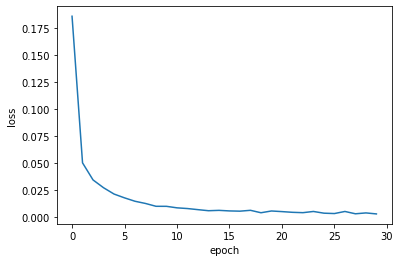

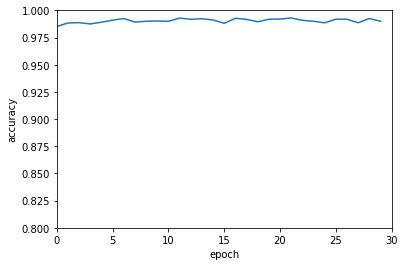

In [ ]:
loss, acc = train("2",model2,trainloader,testloader)

plot(loss,acc)

Epoch 0 - Training loss: 0.1533017134294884

Test set: Accuracy: 98.46%
Epoch 1 - Training loss: 0.046872225509238585

Test set: Accuracy: 98.37%
Epoch 2 - Training loss: 0.032793125499447344

Test set: Accuracy: 98.88%
Epoch 3 - Training loss: 0.025242009273697477

Test set: Accuracy: 98.73%
Epoch 4 - Training loss: 0.018808334348253387

Test set: Accuracy: 98.85%
Epoch 5 - Training loss: 0.016690805760913464

Test set: Accuracy: 98.97%
Epoch 6 - Training loss: 0.01246409363573548

Test set: Accuracy: 99.14%
Epoch 7 - Training loss: 0.010898399426123811

Test set: Accuracy: 98.79%
Epoch 8 - Training loss: 0.008030197684204125

Test set: Accuracy: 99.06%
Epoch 9 - Training loss: 0.009279969869639521

Test set: Accuracy: 99.05%
Epoch 10 - Training loss: 0.006879136570943131

Test set: Accuracy: 99.18%
Epoch 11 - Training loss: 0.007529897613205717

Test set: Accuracy: 99.03%
Epoch 12 - Training loss: 0.006726847291246732

Test set: Accuracy: 99.11%
Epoch 13 - Training loss: 0.0047227986

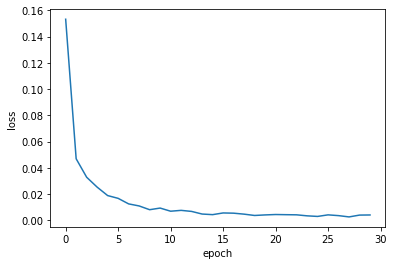

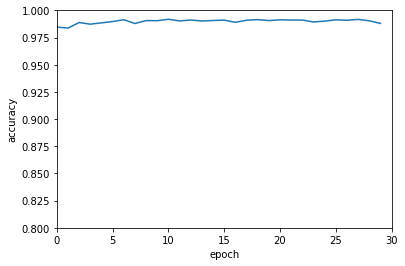

In [ ]:
loss, acc = train("3",model3(),trainloader,testloader)

plot(loss,acc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')